#### Mohd Azri bin Mohd Ridzuan Nyanged
#### Talentlabs - MyMahir CADA Programme

# House Prices Regression Model

## Background

Predicting house prices is a classic regression problem where multiple factors such as structural, locational, and qualitative, influence a property’s market value. Using the Ames Housing dataset from the Housing Prices Competition for Kaggle Learn Users, this project aims to develop a model that accurately estimates home prices based on given features. In this project, I will explore key machine learning concepts, which includes data preprocessing such as feature engineering, different regression algorithms and also model tuning.

In [1]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("/content/drive/MyDrive/predictivemodels/Regression_V1.docx/home-data-for-ml-course/train.csv")
test = pd.read_csv("/content/drive/MyDrive/predictivemodels/Regression_V1.docx/home-data-for-ml-course/test.csv")

## Data Exploration, Understanding & Cleaning

Let's explore the data to understand its characteristics, identify potential issues, and gain insights into relationships between features. We will start by looking at some descriptive statistics and visualizations.

In [4]:
# Dataframe overview
train.info()

# Columns sorted by the number of nulls
train.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [5]:
# Statistical overview
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Based on the initial exploration, several columns have missing values. I will fill these missing values with appropriate strategies:
- `PoolQC`, `MiscFeature`, `Alley`, `Fence`, and `FireplaceQu`, I will replace them with 'None'.
- For numerical features, I will use the median to fill missing values to avoid being influenced by outliers.

In [6]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'):
    train[col] = train[col].fillna('None')

num_cols = train.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    train[col] = train[col].fillna(train[col].median())

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Next, I am going to see the distribution of SalePrice and the correlation between various variables and SalePrice (target variable).

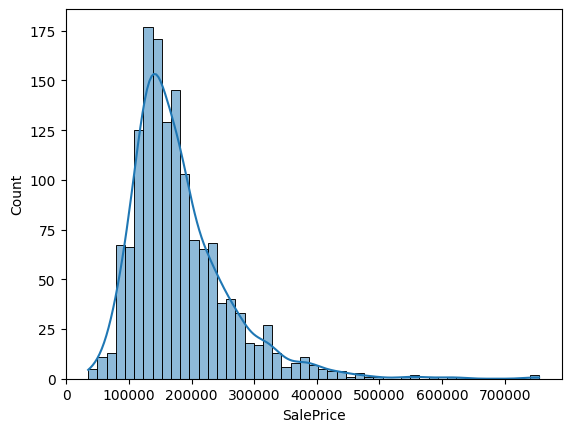

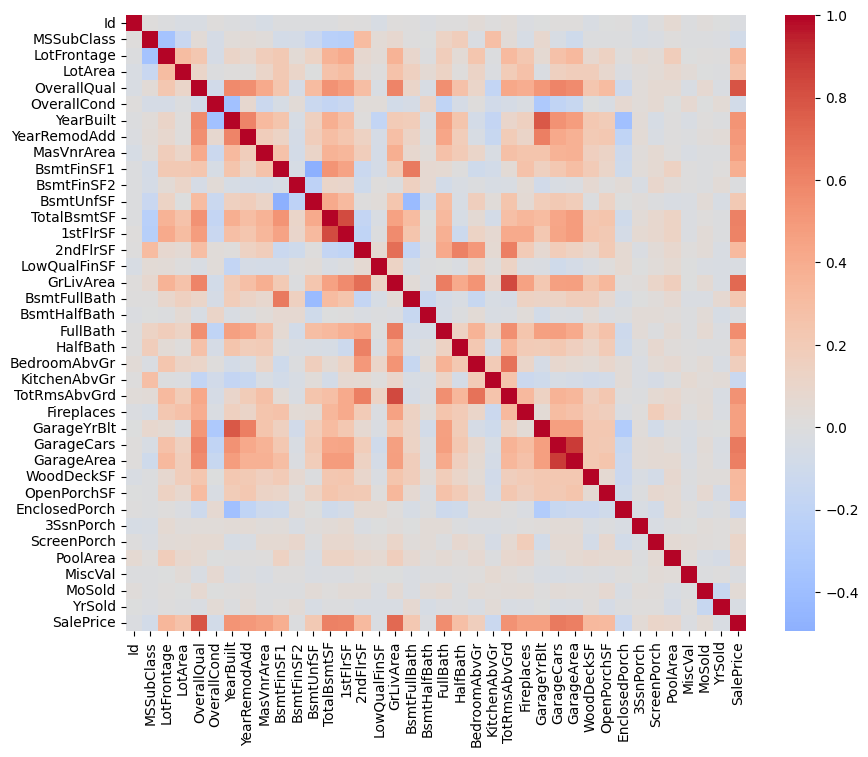

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [7]:
# Correlations (EDA)

import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(train['SalePrice'], kde=True)
plt.show()

numeric_features = train.select_dtypes(include=['int64', 'float64'])
corr = numeric_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

corr_target = corr['SalePrice'].sort_values(ascending=False)
print(corr_target.head(10))


/tmp/ipython-input-1692972096.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist = sns.distplot(np.log(train['SalePrice']),norm_hist=False)


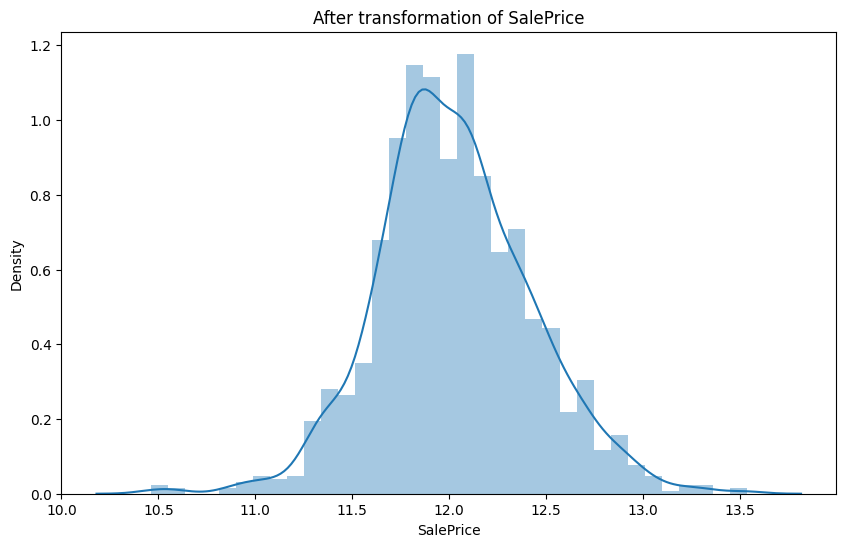

In [8]:
plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
dist = sns.distplot(np.log(train['SalePrice']),norm_hist=False)

As you can see from above, data distribution for the target column is right-skewed, which is expected for housing price data. Since we are building regression model, we have to transform the data to reduce skewness, since regression assumes normality (bell-shaped  curve). To transform the data, I performed a log transformation, and the skewness is greatly reduced and formed a bell-shaped curve.

For housing feature correlation with target variable, it looks like overall quality of the house greatly correlates with housing price. Other features that highly correlates with housing price includes garage features, total square feet, and also bathroom features.

### Univariate analysis

Visualizing frequency/distribution of all columns:


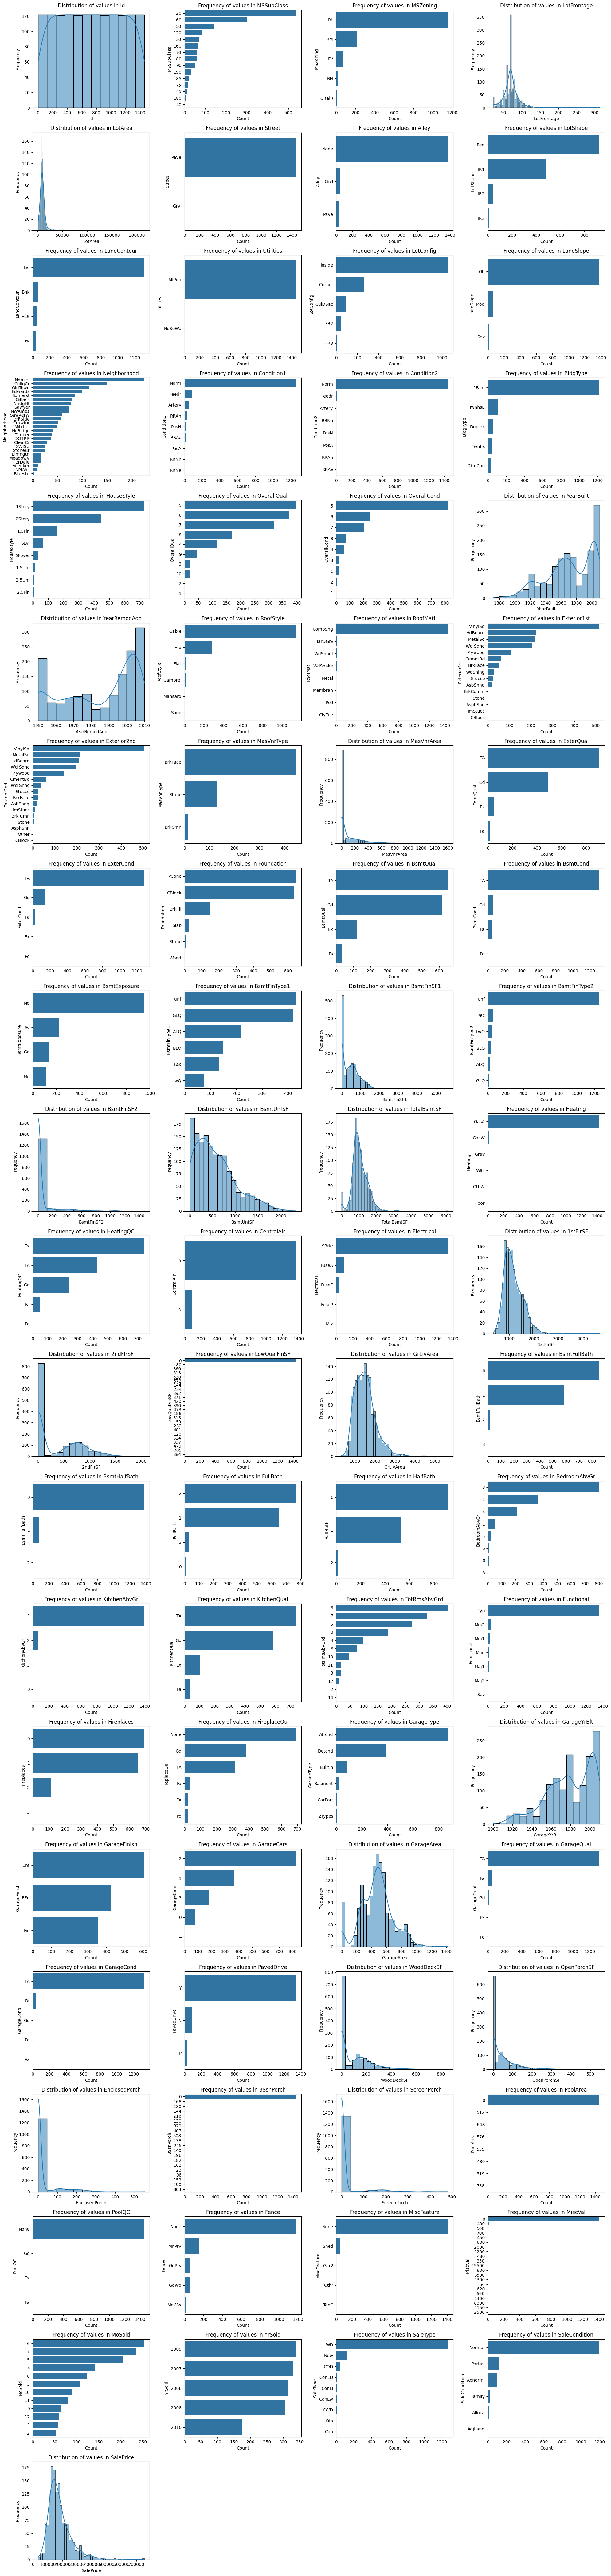

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

print("Visualizing frequency/distribution of all columns:")

n_cols = 4
n_rows = math.ceil(len(train.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(train.columns):
    ax = axes[i]
    if train[col].dtype == 'object' or train[col].nunique() < 50:
        sns.countplot(data=train, y=col, order=train[col].value_counts().index, ax=ax)
        ax.set_title(f'Frequency of values in {col}')
        ax.set_xlabel('Count')
        ax.set_ylabel(col)
    else: # Plot distribution for high-cardinality numerical
        sns.histplot(data=train, x=col, kde=True, ax=ax)
        ax.set_title(f'Distribution of values in {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Model Development
### Feature Engineering

Feature engineering was performed to enhance the model’s ability to capture key structural and qualitative aspects of each property. Several new composite and interaction variables were created based on the results of the correlation analysis and domain understanding of housing attributes.

TotalSF was introduced to represent the total usable living space by combining basement and above-ground areas, as overall floor space has a strong positive relationship with sale price.

TotalBath aggregates all full and half bathrooms across the house, reflecting comfort and functionality.

HouseAge and RemodAge measure the age of the property and the time since its last renovation, providing better insight into depreciation and modernization effects.

TotalPorchSF captures the overall outdoor area, which contributes to aesthetic appeal and outdoor usability.

OverallGrade integrates both construction quality and current condition, summarizing structural excellence in a single numeric measure.

Lastly, GarageCars_x_Quality combines garage capacity and quality level, emphasizing that larger, higher-quality garages contribute more to property value.

In [10]:
# Feature engineering

for df in [train, test]:
    # Total square footage
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # Total bathrooms (weighted for half baths)
    df['TotalBath'] = (
        df['FullBath'] + (0.5 * df['HalfBath']) +
        df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
    )

    # House age and years since remodel
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

    # Total porch area
    df['TotalPorchSF'] = (
        df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] +
        df['ScreenPorch'] + df['WoodDeckSF']
    )

    # Simplify quality/condition
    df['OverallGrade'] = df['OverallQual'] * df['OverallCond']

    # Interaction term
    df['GarageCars_x_Quality'] = df['GarageCars'] * df['GarageQual'].map({
        'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1
    }).fillna(0)




### Model Selection

Before finalizing the Gradient Boosting Regressor model, let's compare the performance of several common regression algorithms to determine the best approach for this dataset. We will evaluate each model using cross-validation to ensure robustness.

Linear Regression: Mean RMSE (log) = 0.1506 (+/- 0.0414)
Ridge Regression: Mean RMSE (log) = 0.1471 (+/- 0.0406)
Lasso Regression: Mean RMSE (log) = 0.3988 (+/- 0.0251)
Random Forest: Mean RMSE (log) = 0.1405 (+/- 0.0191)
Gradient Boosting: Mean RMSE (log) = 0.1339 (+/- 0.0201)
Support Vector Machine: Mean RMSE (log) = 0.1430 (+/- 0.0122)
K-Neighbors Regressor: Mean RMSE (log) = 0.1701 (+/- 0.0173)

Cross-validation RMSE (log) results:


,Linear Regression,Ridge Regression,Lasso Regression,Random Forest,Gradient Boosting,Support Vector Machine,K-Neighbors Regressor
0,0.130495,0.130286,0.433244,0.145562,0.137601,0.149393,0.176493
1,0.126611,0.127976,0.395838,0.122765,0.112400,0.155733,0.179079
2,0.228488,0.227769,0.375370,0.171773,0.170307,0.132137,0.171604
3,0.155253,0.131737,0.421005,0.143804,0.129923,0.152872,0.186677
4,0.112089,0.117875,0.368452,0.118360,0.119470,0.124974,0.136865


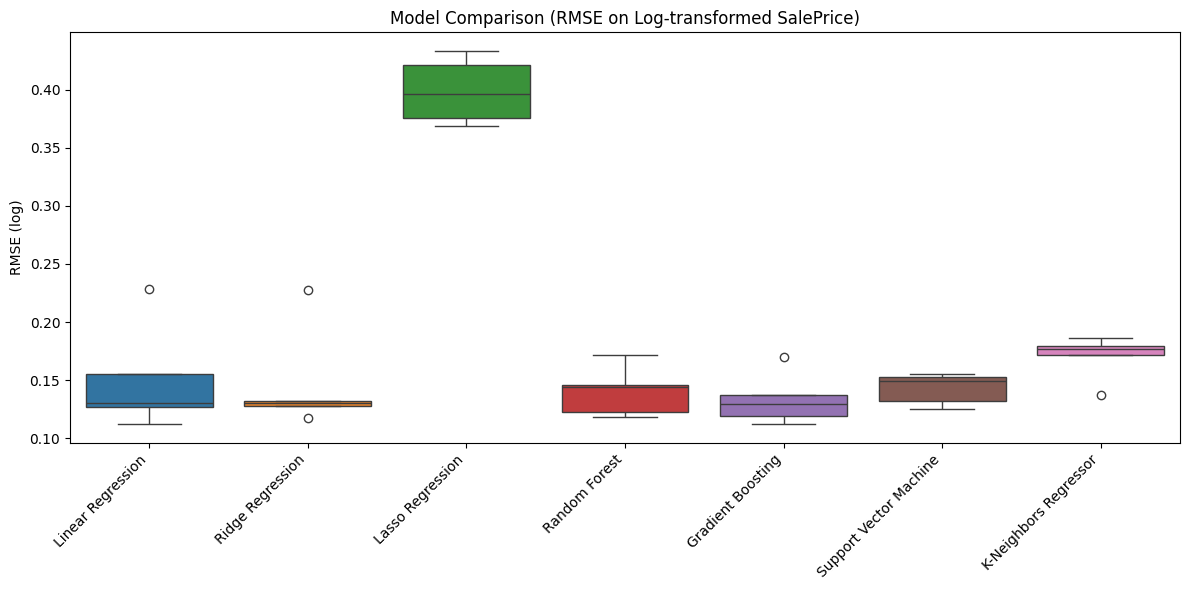

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Re-define features and target (important for this new section)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor()
}

# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    # Use KFold for cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = -cross_val_score(pipeline, X, np.log1p(y), cv=kf, scoring='neg_root_mean_squared_error')
    results[name] = scores
    print(f"{name}: Mean RMSE (log) = {scores.mean():.4f} (+/- {scores.std():.4f})")

# Summarize results
results_df = pd.DataFrame(results)
print("\nCross-validation RMSE (log) results:")
display(results_df)

# Visualize results
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df)
plt.title('Model Comparison (RMSE on Log-transformed SalePrice)')
plt.ylabel('RMSE (log)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Based on the cross-validation results, the Gradient Boosting Regressor consistently shows one of the lowest Mean RMSE values, indicating better predictive performance compared to the other tested algorithms on this dataset. This confirms the choice of Gradient Boosting as the algorithm for the final model development.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the Gradient Boosting model with the preprocessor pipeline
pipeline_gbm = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', GradientBoostingRegressor(random_state=42))])

# Fit model on training split (using log1p for SalePrice)
pipeline_gbm.fit(X_train, np.log1p(y_train))

# Predict on validation split (predictions are on log scale)
y_pred_log = pipeline_gbm.predict(X_valid)

# Compute RMSE on log scale
rmse_log = np.sqrt(mean_squared_error(np.log1p(y_valid), y_pred_log))
print("Validation RMSE (log):", rmse_log)

# Check RMSE in price space (inverse transform predictions)
rmse_real = np.sqrt(mean_squared_error(y_valid, np.expm1(y_pred_log)))
print("Validation RMSE (real prices):", rmse_real)

Validation RMSE (log): 0.13760057149177027
Validation RMSE (real prices): 30052.62027214119


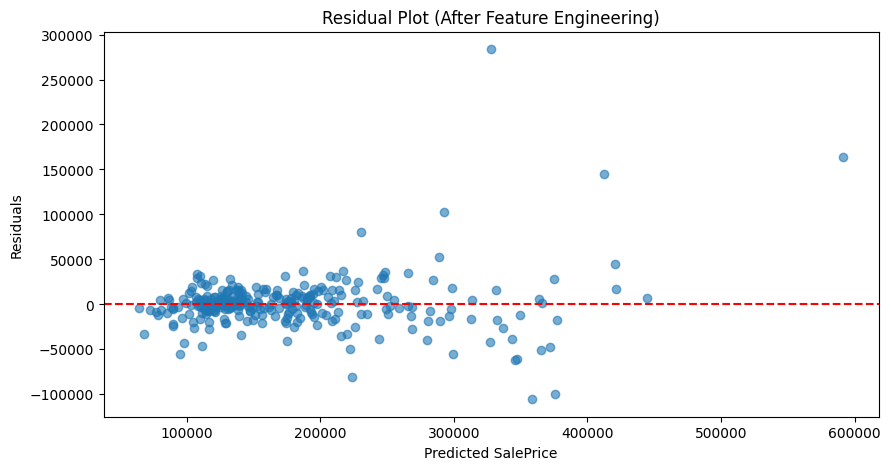

In [13]:
# Calculate residuals
residuals = y_valid - np.expm1(y_pred_log)

# Create residual plot
plt.figure(figsize=(10,5))
plt.scatter(np.expm1(y_pred_log), residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (After Feature Engineering)")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.show()

Based on the residual plot above, most of the data points are scattered around the X-axis especially  for lower priced houses, which means the model can accurately predict house prices for lower price range. However, for higher-priced houses, the model will predict less accurate prices, which means an improvement is needed to improve the model, whether enhancing feature engineering for premium/luxury features or altering model parameter. For now, I will focus on model building. Further improvements shall be made somewhere in the near future.

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Identify numeric and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessing for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_rs = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])


# Create a pipeline for RandomizedSearchCV
# The preprocessor now handles scaling for numerical features
pipeline_rs = Pipeline(steps=[
    ('preprocessor', preprocessor_rs),
    ('regressor', GradientBoostingRegressor(random_state=42))
])


param_dist = {
    'regressor__n_estimators': [100, 300, 500, 800, 1000],
    'regressor__learning_rate': [0.01, 0.03, 0.05, 0.1],
    'regressor__max_depth': [3, 4, 5, 6, 7],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 3, 5],
    'regressor__subsample': [0.6, 0.75, 0.9],
    'regressor__max_features': ['sqrt', 'log2', 0.8]
}

random_search = RandomizedSearchCV(
    pipeline_rs,
    param_distributions=param_dist,
    n_iter=40,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit random search on the training data (using log1p for SalePrice)
random_search.fit(X_train, np.log1p(y_train))

best_gbm = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate on validation set (using log1p for SalePrice)
val_preds_log = best_gbm.predict(X_valid)
val_rmse_log = np.sqrt(mean_squared_error(np.log1p(y_valid), val_preds_log))
print("Validation RMSE (log):", val_rmse_log)

# Check RMSE in price space
val_rmse_real = np.sqrt(mean_squared_error(y_valid, np.expm1(val_preds_log)))
print("Validation RMSE (real prices):", val_rmse_real)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best Parameters: {'regressor__subsample': 0.6, 'regressor__n_estimators': 800, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 3, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 5, 'regressor__learning_rate': 0.03}
Validation RMSE (log): 0.1263224207784569
Validation RMSE (real prices): 25147.935381278076


After hyperparameter tuning, RMSE is improved further, indicating better model generalization and reduced overfitting through optimal parameter adjustment. Next, I will test the model on the test data, produce the predicted test data in CSV and submit in on Kaggle.

In [17]:
# Use the best model found by RandomizedSearchCV to predict on the test set
test_preds_log = best_gbm.predict(test)

# Inverse transform the predictions to the original price scale
test_preds_real = np.expm1(test_preds_log)

# Create submission file
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_preds_real # Use real prices for submission
})

# Save submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
display(submission.head())

Submission file created successfully!


,Id,SalePrice
0,1461,122433.775843
1,1462,161388.405297
2,1463,182891.384472
3,1464,193496.535303
4,1465,194330.038178
